## Analysis of Exit Surveys from DETE and TAFE employees (2014)

**[DETE](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_%28Queensland%29)**: Department of Education, Training and Employment (see [data](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey))  
**[TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)**: Technical and Further Education institute (see [data](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey))   
Both institutions are located in Queensland, Australia   

The data includes among others reasons for the end of the employment and data describing the employment duration.

**Questions explored in this notebook**:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [419]:
import pandas as pd
import numpy as np
import seaborn as sns

In [420]:
%matplotlib inline

### DETE data

In [421]:
dete_survey = pd.read_csv('dete_survey.csv')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [422]:
dete_survey.info()
dete_survey.iloc[:,25:59].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,True,A,A,N,N,N,A,A,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,False,False,False,A,A,N,N,N,N,A,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,False,False,True,N,N,N,N,N,N,N,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,False,False,False,A,N,N,N,A,A,N,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,True,False,False,A,A,N,N,D,D,N,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### TAFE data

In [423]:
tafe_survey = pd.read_csv('tafe_survey.csv')
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [424]:
tafe_survey.iloc[:,15:70].head()

,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,...,InductionInfo. Induction Manual Topic: Did you undertake Team Induction?,Workplace. Topic:Did you and your Manager develop a Performance and Professional Development Plan (PPDP)?,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification
0,NaN,NaN,NaN,Agree,Agree,Agree,Neutral,Agree,Agree,Agree,...,-,Yes,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO)
1,-,-,NaN,Agree,Agree,Agree,Agree,Agree,Strongly Agree,Strongly Agree,...,NaN,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN
2,-,NONE,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Strongly Agree,...,NaN,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN
3,-,-,NaN,Agree,Agree,Agree,Agree,Agree,Agree,Agree,...,-,Yes,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN
4,-,-,NaN,Agree,Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Strongly Agree,...,-,Yes,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT)


### DETE / TAFE data comparison

In [425]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [426]:
dete_survey['SeparationType'].isnull().sum()

0

In [427]:
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [428]:
tafe_survey['Reason for ceasing employment'].isnull().sum()

1

#### observations

- different degrees of differentiation of employment ceasing reasons
- TAFE data includes complete questions as columns
- DETE data employment duration need to be calculated
- both data sets include a comparable number of rows

### data cleaning
To answer our questions we do not take into account the participants' degrees of willingness to share information.
Therefore 'Not Stated' values are interpreted as NaN.

The survey data includes ordinal values describing the survey question's answers. We drop these columns for now to focus on the more high level picture for now.

**interpret 'Not Stated' values as NaN**

In [429]:
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])

**drop unneeded columns**

In [430]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [431]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

**rename columns**

In [432]:
def print_columns(df):
    for column in df.columns:
        print(column)

In [433]:
print_columns(dete_survey_updated)

ID
SeparationType
Cease Date
DETE Start Date
Role Start Date
Position
Classification
Region
Business Unit
Employment Status
Career move to public sector
Career move to private sector
Interpersonal conflicts
Job dissatisfaction
Dissatisfaction with the department
Physical work environment
Lack of recognition
Lack of job security
Work location
Employment conditions
Maternity/family
Relocation
Study/Travel
Ill Health
Traumatic incident
Work life balance
Workload
None of the above
Gender
Age
Aboriginal
Torres Strait
South Sea
Disability
NESB


In [434]:
def normalize_column_names(columns):
    normalized = columns.str.lower().str.strip()
    normalized = normalized.str.replace(r'\s+', ' ')
    normalized = normalized.str.replace(' ', '_')
    return normalized

In [435]:
dete_survey_updated.columns = normalize_column_names(dete_survey_updated.columns)

In [436]:
columns_map = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
}
tafe_survey_updated = tafe_survey_updated.rename(columns=columns_map)

In [437]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [438]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Eventually the TAFE and DETE datasets should be combined therefore we rename the corresponding columns in each dataset to have matching names.

#### Prepare data: Resignations
For our inquiry only data associated with resignations are relevant, so we filter both data sets by *separationtype* also taking into account subtypes.

In [439]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [440]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [441]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

### data checking

In [442]:
print('dete_start_date invalid', dete_resignations['dete_start_date'].isna().sum())
print('cease_date invalid', dete_resignations['cease_date'].isna().sum())

dete_start_date invalid 28
cease_date invalid 11


**cease_date (DETE)**

In [443]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [444]:
pattern = r'([12][0-9]{3})'
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern, expand=False).astype('float')
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

**dete_start_date**

In [445]:
dete_resignations['dete_start_date'].describe()

count     283.000000
mean     2002.067138
std         9.914479
min      1963.000000
25%      1997.000000
50%      2005.000000
75%      2010.000000
max      2013.000000
Name: dete_start_date, dtype: float64

In [446]:
def invalid_periods(df, start_year_col, end_year_col):
    is_nan = df[start_year_col].isna() | df[end_year_col].isna()
    out_of_range_start = df[start_year_col] < 1940
    invalid_period = df[start_year_col] > df[end_year_col]
    return invalid_period | out_of_range_start | is_nan

**invalid periods**  
*DETE*: We drop 38 resignations for which the duration of employment can not be derived due to missing start and/or cease dates. All the existing dates have realistic values.  
*TAFE*: There are 5 rows with missing values for cease date but this is okay since the dataset already includes a column describing the duration of employment.

In [447]:
dete_invalid = invalid_periods(dete_resignations, 'dete_start_date', 'cease_date')
print('number of rows with invalid/missing periods: ', dete_invalid.sum())
dete_resignations[dete_invalid]

number of rows with invalid/missing periods:  38


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
16,17,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,False,False,False,Male,61 or older,NaN,NaN,NaN,NaN,NaN
39,40,Resignation-Move overseas/interstate,2012.0,NaN,NaN,Teacher,NaN,Central Queensland,NaN,Permanent Full-time,...,True,False,False,Female,21-25,NaN,NaN,NaN,NaN,NaN
106,107,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,Central Office,Training and Tertiary Education Queensland,Temporary Part-time,...,True,False,False,Female,46-50,NaN,NaN,Yes,NaN,NaN
140,141,Resignation-Other employer,2012.0,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,Permanent Part-time,...,False,False,False,Female,51-55,NaN,NaN,NaN,NaN,NaN
196,197,Resignation-Other reasons,2012.0,NaN,NaN,Teacher Aide,NaN,North Queensland,NaN,Permanent Part-time,...,False,False,True,Female,46-50,NaN,NaN,NaN,NaN,NaN
288,289,Resignation-Move overseas/interstate,2013.0,NaN,NaN,Public Servant,AO5-AO7,Central Office,Education Queensland,Permanent Full-time,...,False,True,False,Female,26-30,NaN,NaN,NaN,NaN,NaN
291,292,Resignation-Other employer,2013.0,NaN,NaN,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
293,294,Resignation-Move overseas/interstate,2012.0,NaN,NaN,Schools Officer,NaN,South East,NaN,Permanent Part-time,...,False,False,False,NaN,61 or older,NaN,NaN,NaN,NaN,NaN
301,302,Resignation-Other employer,2012.0,NaN,NaN,School Administrative Staff,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
343,344,Resignation-Other employer,2012.0,NaN,NaN,School Administrative Staff,NaN,Metropolitan,NaN,Permanent Part-time,...,False,False,True,Female,41-45,NaN,NaN,NaN,NaN,Yes


In [448]:
dete_resignations.shape[0]

311

In [449]:
dete_resignations.drop(dete_resignations.index[dete_invalid], inplace=True)

In [450]:
dete_resignations.shape[0]

273

**cease_date (TAFE)**

In [451]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index()

 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: cease_date, dtype: int64

we exclude one resignation that clearly falls out of the range of years of the rest of the resignations.

In [452]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()

2006.0      1
2010.0      2
2012.0    115
2013.0    133
2014.0     22
Name: cease_date, dtype: int64

In [453]:
dete_resignations = dete_resignations[dete_resignations['cease_date'] > 2008]
dete_resignations['cease_date'].value_counts(dropna=False).sort_index()

2010.0      2
2012.0    115
2013.0    133
2014.0     22
Name: cease_date, dtype: int64

### add *institute_service* column (DETE)

In [454]:
dete_cease = dete_resignations['cease_date']
dete_start = dete_resignations['dete_start_date']
dete_resignations['institute_service'] = dete_cease - dete_start
dete_resignations['institute_service'].describe()

count    272.000000
mean      10.496324
std        9.929641
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

## resignations due to dissatisfaction

In [455]:
tafe_dissatisfaction_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
for tafe_col in tafe_dissatisfaction_cols:
    print(tafe_resignations[tafe_col].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [456]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    if val == '-':
        return False
    return True

In [457]:
tafe_resignations[tafe_dissatisfaction_cols] = tafe_resignations[tafe_dissatisfaction_cols].applymap(update_vals)

In [458]:
for tafe_col in tafe_dissatisfaction_cols:
    print(tafe_resignations[tafe_col].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


### add *dissatisfied* column

In [459]:
dete_dissatisfaction_cols = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]

dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfaction_cols].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfaction_cols].any(axis=1, skipna=False)

dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## combine DETE and TAFE data

In [460]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [461]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined['institute'].value_counts()

TAFE    340
DETE    272
Name: institute, dtype: int64

### drop columns with few non null values

In [462]:
print('columns before:',combined.shape[1])

columns before: 53


In [463]:
combined_updated = combined.dropna(axis=1, thresh=500)
print('columns after:',combined_updated.shape[1])

columns after: 10


In [464]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612 entries, 3 to 701
Data columns (total 10 columns):
age                  560 non-null object
cease_date           607 non-null float64
dissatisfied         604 non-null object
employment_status    562 non-null object
gender               557 non-null object
id                   612 non-null float64
institute            612 non-null object
institute_service    562 non-null object
position             559 non-null object
separationtype       612 non-null object
dtypes: float64(2), object(8)
memory usage: 52.6+ KB


## categorize institute_service 

In [465]:
combined_updated['institute_service'].astype('str')

3                   7.0
5                  18.0
8                   3.0
9                  15.0
11                  3.0
12                 14.0
14                  5.0
20                 30.0
21                 32.0
22                 15.0
23                 39.0
25                 17.0
27                  7.0
33                  9.0
34                  6.0
37                  1.0
40                 35.0
41                 38.0
42                  1.0
43                 36.0
48                  3.0
50                  3.0
51                 19.0
55                  4.0
57                  9.0
61                  1.0
69                  6.0
71                  1.0
87                  5.0
90                 26.0
             ...       
659                 1-2
660                 3-4
661                 5-6
665                 nan
666                 nan
669                 3-4
670                 nan
671    Less than 1 year
675    Less than 1 year
676                 1-2
677    Less than

**extract digits** and calculate average value for ambiguous data

In [466]:
service = combined_updated['institute_service'].astype('str').copy()
service = service.str.replace('Less', '0')
service = service.str.extract(r'(0).*(\d)|(\d+)-(\d+)|(\d+)', expand=False)
service = service.astype('float').mean(axis=1)

### add *service_cat* column

In [467]:
service_stages = [
    (11, '4. Veteran'),
    (7, '3. Established'),
    (3, '2. Experienced'),
    (0, '1. New')
]
def map_to_stage(val):
    if pd.isnull(val):
        return val
    for min, name in service_stages:
        if (val >= min):
            return name



In [468]:
combined = combined_updated.copy()
combined['service_cat'] = service.apply(map_to_stage)

In [469]:
combined['dissatisfied'].value_counts(dropna=False)

False    376
True     228
NaN        8
Name: dissatisfied, dtype: int64

In [470]:
combined['dissatisfied'].fillna(False, inplace=True)

In [471]:
combined['dissatisfied'].value_counts(dropna=False)

False    384
True     228
Name: dissatisfied, dtype: int64

In [472]:
combined_pv = combined.pivot_table('dissatisfied', combined['service_cat'])

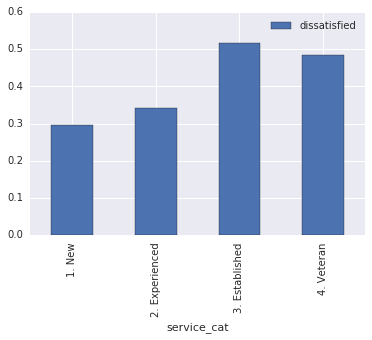

In [473]:
desc_service_stages_names = [stage[1] for stage in service_stages] 
combined_pv.plot(kind='bar')

## Conclusion

*New Employees* (less than 3 years) are the group with the least dissatisfaction motivated resignations (30%).  
More than 50% of *Established employees* (7 to 10 years) resigned due to some dissa